In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn')
%matplotlib inline 

Import the data (make sure you update this on a daily basis)
Verify if you had activated internet in your kaggle-kernel. It's on the right side bar, in settings.

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


In [4]:
confirmed_df.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20'],
      dtype='object')

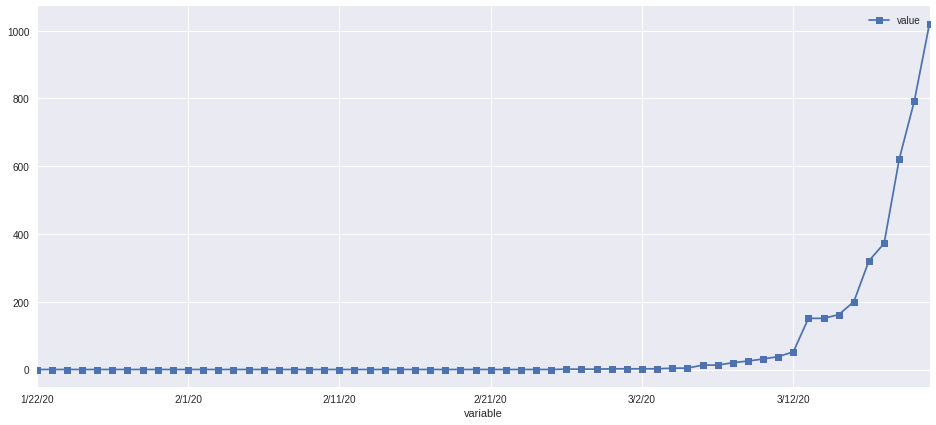

In [5]:
pd.melt(confirmed_df[confirmed_df['Country/Region']=='Brazil'].iloc[:,4:]).\
    set_index('variable').plot(style='-s',figsize=(16,7))

In [6]:
# ['Country/Region']+list(confirmed_df.columns[4:].values)

In [7]:
df_confimed = pd.melt(confirmed_df[['Country/Region']+list(confirmed_df.columns[4:].values)],id_vars='Country/Region',var_name='date',value_name='#')

In [8]:
# FIx dates
new_d = []
for d in df_confimed.date.values:
    print(d,d.split('/'),'2020'+d.split('/')[0].zfill(2)+d.split('/')[1].zfill(2))
    new_d.append('2020'+d.split('/')[0].zfill(2)+d.split('/')[1].zfill(2))
df_confimed['date'] = new_d

1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', '20'] 20200122
1/22/20 ['1', '22', 

In [9]:
df = df_confimed.groupby(['date','Country/Region']).first().unstack().reset_index().fillna(0)

In [10]:
df.columns = df.columns.map(''.join)

In [11]:
df_corr = df.iloc[:,1:].corr()

In [12]:
country = '#Brazil'
for index, row in df_corr.iterrows():
    for c in df_corr.columns:
        if index!=c and row[c]>0.993 and index==country:
            print(index,c,row[c])

#Brazil #Ireland 0.9967407143837876
#Brazil #North Macedonia 0.997298448537509
#Brazil #Portugal 0.9975184768019287
#Brazil #Russia 0.9945672569415293
#Brazil #South Africa 0.9939270321316046


In [13]:
# df.sort_values(by='date',ascending=False)

In [14]:
# First confirmed case at
df[df['#Brazil']>0].sort_values(by='date').date.values[0]

'20200226'

Text(0, 0.5, '#')

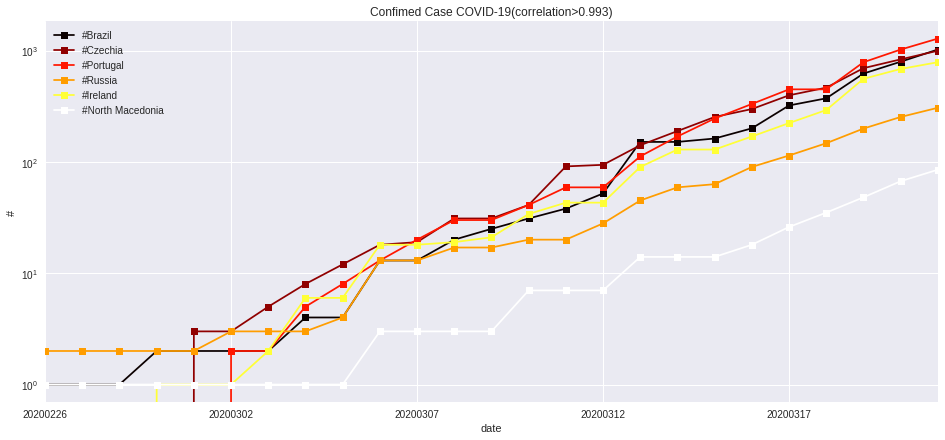

In [15]:
df[df.date>='20200226'].set_index('date')[['#Brazil','#Czechia','#Portugal','#Russia','#Ireland','#North Macedonia']].plot(style='-s',figsize=(16,7),cmap='hot')
plt.yscale('log')
plt.title('Confimed Case COVID-19(correlation>0.993)')
plt.ylabel('#')